# MOwNiT 

# Laboratorium 5 - Aproksymacja funkcji ciągłej


## Wielomianowa aproksymacja średniokwadratowa

Celem wielomianowej aproksymacji średniokwadratowej $n$-tego stopnia funkcji $f$ ciągłej na przedziale $[a,b]$ jest znalezienie takiej kombinacji liniowej $W(x)=a_nx^n+a_{n-1}x^{n-1}+...+a_0$ jednomianów $\{1,x,x^2,...,x^n\}$, aby$$\|W-f\|^2=\int_a^b(W(x)-f(x))^2dx$$była minimalna.

Wielomian najlepszej aproksymacji (a raczej jego współczynniki w kolejności od $a_n$ do $a_0$) znajduje funkcja `numpy.polyfit(x, y, deg)`

In [27]:
import numpy as np

#tworzenie punktów aproksymacji
x=np.linspace(0,3,20)
y=np.exp(x)

#wielomiany aproksymacyjne stopni 2,3,4
W2=np.polyfit(x,y,2)
W3=np.polyfit(x,y,3)
W4=np.polyfit(x,y,4)

In [28]:
print(W2,W3,W4)

[ 2.66353717 -2.2955281   1.82584423] [ 0.85441262 -1.18131961  2.20114374  0.84812165] [ 0.20833764 -0.39561322  1.1908604   0.70971996  1.0202036 ]


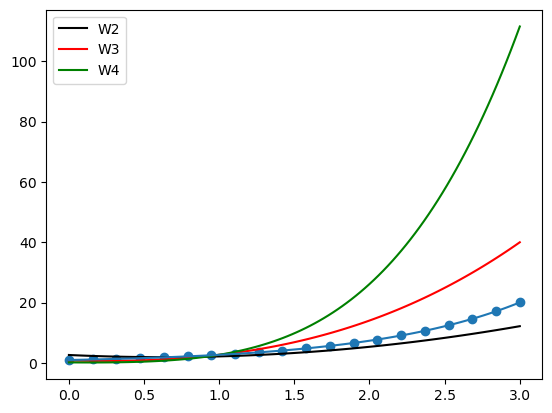

In [29]:
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

xp=np.linspace(0,3,100)

plt.plot(xp,Polynomial(W2)(xp),'k',label='W2')
plt.plot(xp,Polynomial(W3)(xp),'r',label='W3')
plt.plot(xp,Polynomial(W4)(xp),'g',label='W4')
plt.plot(xp,np.exp(xp))
plt.scatter(x,y)
plt.legend()
plt.show()

## Aproksymacja Czebyszewa

Inną rodziną ortogonalną w normie $L^2$ są *wielomiany Czebyszewa* $T_k(x)$. Definiuje się je rekurencyjnie
$$\begin{aligned}T_{0}(x)&=1,\\T_{1}(x)&=x,\\T_{k+1}(x)&=2x\,T_{k}(x)-T_{k-1}(x)\end{aligned}$$
lub wzorem jawnym
$$T_k(x)=\frac{(x+\sqrt{x^2-1})^k+(x-\sqrt{x^2-1})^k}{2}.$$

Pierwsze kilka wielomianów Czebyszewa:
$$\begin{aligned}T_{0}(x)&=1\\T_{1}(x)&=x\\T_{2}(x)&=2x^{2}-1\\T_{3}(x)&=4x^{3}-3x\\T_{4}(x)&=8x^{4}-8x^{2}+1\\T_{5}(x)&=16x^{5}-20x^{3}+5x\end{aligned}$$

Dowolną funkcję $f(x)$ ciągłą na przedziale $[a,b]$ możemy rozwinąć w *szereg Czebyszewa* $$f(x)\approx\sum_{i=0}^\infty c_iT_i(x),$$
a stąd otrzymujemy aproksymację Czebyszewa wielomianem zadanego stopnia $n$ $$f(x)\approx \sum_{i=0}^n c_iT_i(x).$$

W pythonie szereg Czebyszewa otrzymujemy funkcją `numpy.polynomial.chebyshev.Chebyshev(coef)` gdzie `coef` to tablica współczynników $c_i$ w kolejności od $c_0$.

In [30]:
from numpy.polynomial import chebyshev

chebyshev.Chebyshev([1,1,1])

Chebyshev([1., 1., 1.], domain=[-1,  1], window=[-1,  1], symbol='x')

Funkcja `polynomial.chebyshev.cheb2poly(c)` konwertuje szereg na wielomian.

In [31]:
chebyshev.cheb2poly([1,1,1])

array([0., 1., 2.])

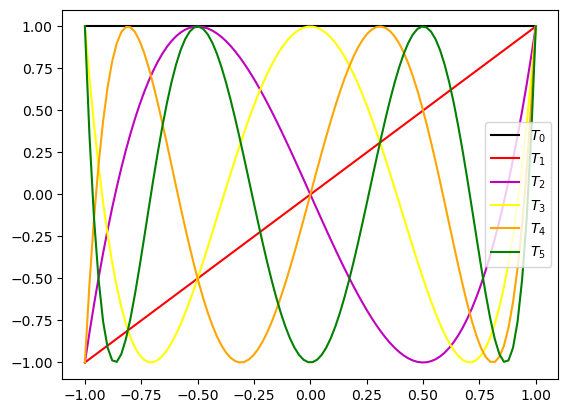

In [32]:
xp=np.linspace(-1,1,100)

plt.plot(xp,Polynomial(chebyshev.cheb2poly([1]))(xp),'k',label='$T_0$')
plt.plot(xp,Polynomial(chebyshev.cheb2poly([0,1]))(xp),'r',label='$T_1$')
plt.plot(xp,Polynomial(chebyshev.cheb2poly([0,0,0,1]))(xp),'m',label='$T_2$')
plt.plot(xp,Polynomial(chebyshev.cheb2poly([0,0,0,0,1]))(xp),'yellow',label='$T_3$')
plt.plot(xp,Polynomial(chebyshev.cheb2poly([0,0,0,0,0,1]))(xp),'orange',label='$T_4$')
plt.plot(xp,Polynomial(chebyshev.cheb2poly([0,0,0,0,0,0,1]))(xp),'g',label='$T_5$')
plt.legend()
plt.show()

Współczynniki aproksymacji wielomianami Czebyszewa otrzymujemy funkcją `polynomial.chebyshev.chebfit(x, y, deg)`.

In [33]:
#tworzenie punktów aproksymacji
x=np.linspace(0,3,20)
y=np.exp(x)

#współczynniki aproksymacji wielomianami Czebyszewa
coeff2=chebyshev.chebfit(x,y,2)
coeff3=chebyshev.chebfit(x,y,3)
coeff4=chebyshev.chebfit(x,y,4)
print(coeff2)
print(coeff3)
print(coeff4)

#współczynniki otrzymanych wielomianów aproksymacyjnych
C2=chebyshev.cheb2poly(coeff2)
C3=chebyshev.cheb2poly(coeff3)
C4=chebyshev.cheb2poly(coeff4)
print(C2)
print(C3)
print(C4)

[ 3.15761281 -2.2955281   1.33176858]
[ 0.25746184  2.8419532  -0.59065981  0.21360315]
[ 1.69376041  0.41301005  0.69959902 -0.0989033   0.0260422 ]
[ 1.82584423 -2.2955281   2.66353717]
[ 0.84812165  2.20114374 -1.18131961  0.85441262]
[ 1.0202036   0.70971996  1.1908604  -0.39561322  0.20833764]


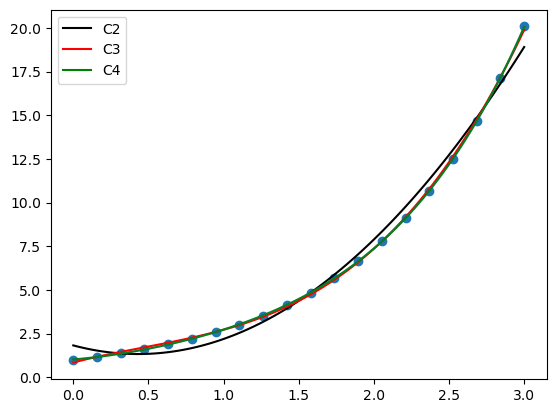

In [34]:
xp=np.linspace(0,3,100)

plt.plot(xp,Polynomial(C2)(xp),'k',label='C2')
plt.plot(xp,Polynomial(C3)(xp),'r',label='C3')
plt.plot(xp,Polynomial(C4)(xp),'g',label='C4')
plt.plot(xp,np.exp(xp),alpha=0.2)
plt.scatter(x,y)
plt.legend()
plt.show()

### Wielomiany Czebyszewa a interpolacja

Okazuje się, że zera wielomianów Czebyszewa, nazywane *węzłami Czebyszewa* są o wiele lepszym zestawem węzłów do interpolacji wielomianowej, niż losowy czy jednostajny wybór węzłów.

Na przedziale $[-1,1]$ węzły Czebyszewa są dane wzorem $$ x_{k}=\cos \left({\frac {2k-1}{2n}}\pi \right),\quad k=1,\dots ,n.$$

W dowolnym przedziale $[a,b]$ węzły te mają postać $$x_{k}={\frac {1}{2}}(a+b)+{\frac {1}{2}}(b-a)\cos \left({\frac {2k-1}{2n}}\pi \right),\quad k=1,\dots ,n.$$



### Ćwiczenie 1. (1 pkt)

Porównaj interpolację Lagrange'a funkcji $f(x)=\sin(\pi x)$ na przedziale $[-1,1]$ otrzymaną dla trzech wyborów węzłów interpolacji:
- losowy wybór węzłów
- jednostajny rozkład węzłów na przedziale
- węzły Czebyszewa

Naszkicuj funkcję bazową oraz otrzymane wielomiany interpolacyjne wraz z węzłami interpolacji. Napisz funkcję `ASE(f,W)`, która obliczy przybliżony błąd $\|f-W\|^2$. Oblicz ASE dla każdego wielomianu interpolacyjnego.

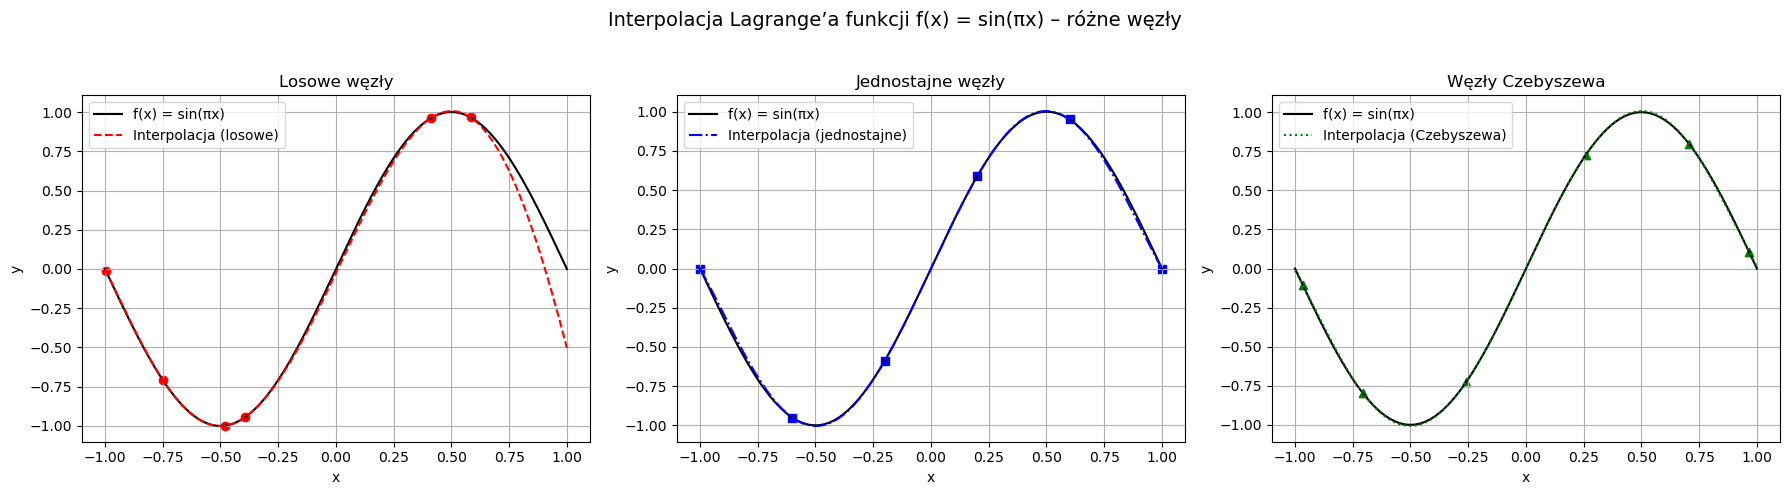

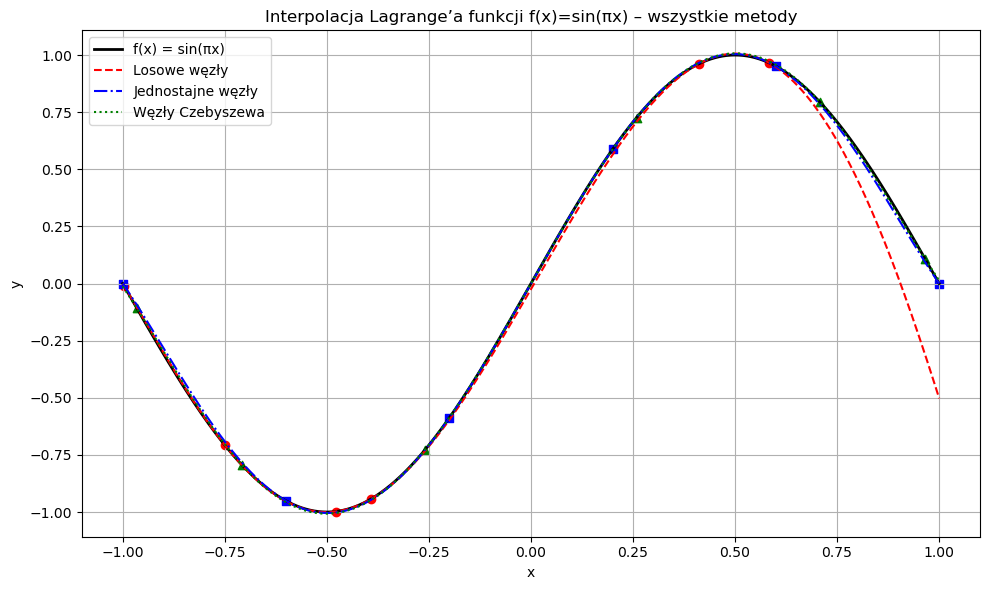

ASE dla węzłów losowych:      0.020869442925962066
ASE dla węzłów jednostajnych: 0.00026264476894306973
ASE dla węzłów Czebyszewa:    6.398311113062166e-05


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

def f(x):
    return np.sin(np.pi * x)

def ASE(f, W, a=-1, b=1, num_points=10000):
    dx = (b - a) / num_points
    midpoints = np.linspace(a + dx/2, b - dx/2, num_points)
    error_squared = (f(midpoints) - W(midpoints))**2
    return dx * np.sum(error_squared)

n = 6
x_dense = np.linspace(-1, 1, 1000)
fx = f(x_dense)

# Interpolacja: losowe węzły
nodes_random = np.sort(np.random.uniform(-1, 1, n))
values_random = f(nodes_random)
P_random = lagrange(nodes_random, values_random)

# Interpolacja: jednostajne węzły
nodes_uniform = np.linspace(-1, 1, n)
values_uniform = f(nodes_uniform)
P_uniform = lagrange(nodes_uniform, values_uniform)

# Interpolacja: węzły Czebyszewa
i = np.arange(n)
nodes_chebyshev = np.cos((2 * i + 1) * np.pi / (2 * n))
nodes_chebyshev = np.sort(nodes_chebyshev)
values_chebyshev = f(nodes_chebyshev)
P_chebyshev = lagrange(nodes_chebyshev, values_chebyshev)

# Trzy wykresy obok siebie
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].plot(x_dense, fx, 'k-', label='f(x) = sin(πx)')
axs[0].plot(x_dense, P_random(x_dense), 'r--', label='Interpolacja (losowe)')
axs[0].scatter(nodes_random, f(nodes_random), color='r', marker='o')
axs[0].set_title("Losowe węzły")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(x_dense, fx, 'k-', label='f(x) = sin(πx)')
axs[1].plot(x_dense, P_uniform(x_dense), 'b-.', label='Interpolacja (jednostajne)')
axs[1].scatter(nodes_uniform, f(nodes_uniform), color='b', marker='s')
axs[1].set_title("Jednostajne węzły")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].legend()
axs[1].grid(True)

axs[2].plot(x_dense, fx, 'k-', label='f(x) = sin(πx)')
axs[2].plot(x_dense, P_chebyshev(x_dense), 'g:', label='Interpolacja (Czebyszewa)')
axs[2].scatter(nodes_chebyshev, f(nodes_chebyshev), color='g', marker='^')
axs[2].set_title("Węzły Czebyszewa")
axs[2].set_xlabel("x")
axs[2].set_ylabel("y")
axs[2].legend()
axs[2].grid(True)

plt.suptitle("Interpolacja Lagrange’a funkcji f(x) = sin(πx) – różne węzły", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Wykres zbiorczy
plt.figure(figsize=(10, 6))
plt.plot(x_dense, fx, 'k-', linewidth=2, label='f(x) = sin(πx)')
plt.plot(x_dense, P_random(x_dense), 'r--', label='Losowe węzły')
plt.plot(x_dense, P_uniform(x_dense), 'b-.', label='Jednostajne węzły')
plt.plot(x_dense, P_chebyshev(x_dense), 'g:', label='Węzły Czebyszewa')

plt.scatter(nodes_random, f(nodes_random), color='r', marker='o')
plt.scatter(nodes_uniform, f(nodes_uniform), color='b', marker='s')
plt.scatter(nodes_chebyshev, f(nodes_chebyshev), color='g', marker='^')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolacja Lagrange’a funkcji f(x)=sin(πx) – wszystkie metody')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Obliczanie ASE
ase_random = ASE(f, P_random)
ase_uniform = ASE(f, P_uniform)
ase_chebyshev = ASE(f, P_chebyshev)

print("ASE dla węzłów losowych:     ", ase_random)
print("ASE dla węzłów jednostajnych:", ase_uniform)
print("ASE dla węzłów Czebyszewa:   ", ase_chebyshev)

## Aproksymacja Taylora

Podobnie jak w przypadku Czebyszewa aproksymacja Taylora opiera się na rozwinięciu funkcji gładkiej $f(x)$ w *szereg Taylora* w punckie $a$ $$f(a)+{\frac {f'(a)}{1!}}(x-a)+{\frac {f''(a)}{2!}}(x-a)^{2}+\cdots =\sum _{k=0}^{\infty }{\frac {f^{(k)}(a)}{k!}}(x-a)^{k}.$$

Aproksymację Taylora wielomianem stopnia $n$ otrzymujemy zatem jako $$f(x)\approx \sum _{k=0}^{n }{\frac {f^{(k)}(a)}{k!}}(x-a)^{k}.$$

W pythonie aproksymację Taylora znajdziemy w pakiecie scipy `approximate_taylor_polynomial(f, x, degree, scale)`, gdzie `f` to funkcja aproksymowana, `x` to punkt rozwinięcia, `degree` to stopień wielomianu, `scale` to szerokość przedziału, na którym obliczany jest wielomian aproksymacyjny.

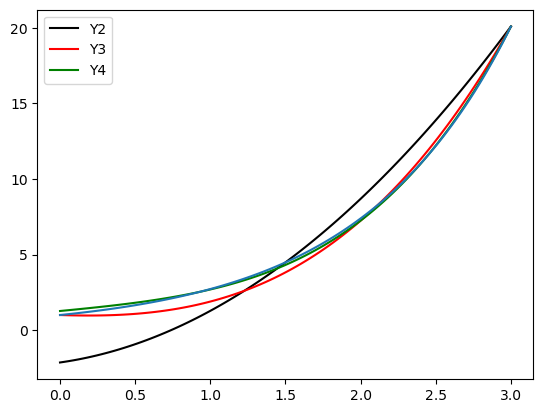

In [36]:
from scipy.interpolate import approximate_taylor_polynomial

Y2=approximate_taylor_polynomial(np.exp,0,2,3)
Y3=approximate_taylor_polynomial(np.exp,0,3,3)
Y4=approximate_taylor_polynomial(np.exp,0,4,3)


xp=np.linspace(0,3,100)

plt.plot(xp,Y2(xp),'k',label='Y2')
plt.plot(xp,Y3(xp),'r',label='Y3')
plt.plot(xp,Y4(xp),'g',label='Y4')
plt.plot(xp,np.exp(xp))
plt.legend()
plt.show()

### Aproksymacja Pade ze współczynników Taylora

Mając współczynniki szeregu Taylora (lub wielomianu aproksymacji Taylora) możemy szybko otrzymać aproksymację wymierną Pade w postaci $\frac{p(x)}{q(x)}$ za pomocą funkcji `scipy.interpolate.pade(an, m, n)`, gdzie `an` to współczynniki Taylora w kolejności od wyrazu wolnego, `m` to zadany stopień licznika `p(x)` a opcjonalne `n` to stopień mianownika `q(x)`.

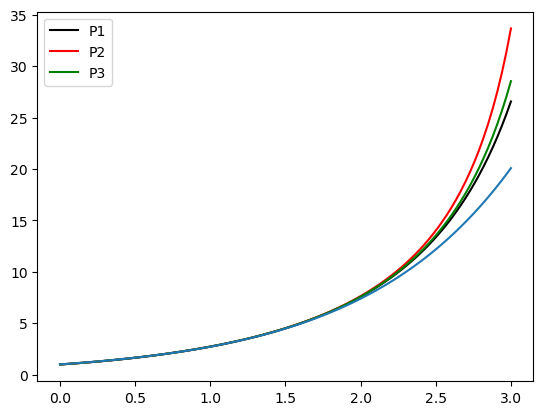

In [37]:
from scipy.interpolate import pade

Y6=approximate_taylor_polynomial(np.exp,0,6,3)

P1=pade(Y6.coefficients[::-1],1)
P2=pade(Y6.coefficients[::-1],2)
P3=pade(Y6.coefficients[::-1],3)

xp=np.linspace(0,3,100)

plt.plot(xp,(P1[0](xp))/(P1[1](xp)),'k',label='P1')
plt.plot(xp,(P2[0](xp))/(P2[1](xp)),'r',label='P2')
plt.plot(xp,(P3[0](xp))/(P3[1](xp)),'g',label='P3')
plt.plot(xp,np.exp(xp))
plt.legend()
plt.show()

### Ćwiczenie 2. (2 pkt)

Porównaj poznane metody aproksymacji na przykładzie funkcji $f(x)=\sin(\pi x)$ na przedziale $[-1,1]$. Dobierz samodzielnie stopień wielomianów. Porównaj otrzymane wielomiany na jednym wykresie. Korzystając z funkcji z ćwiczenia 1 oblicz ASE dla każdego z otrzymanych wielomianów aproksymacyjnych.

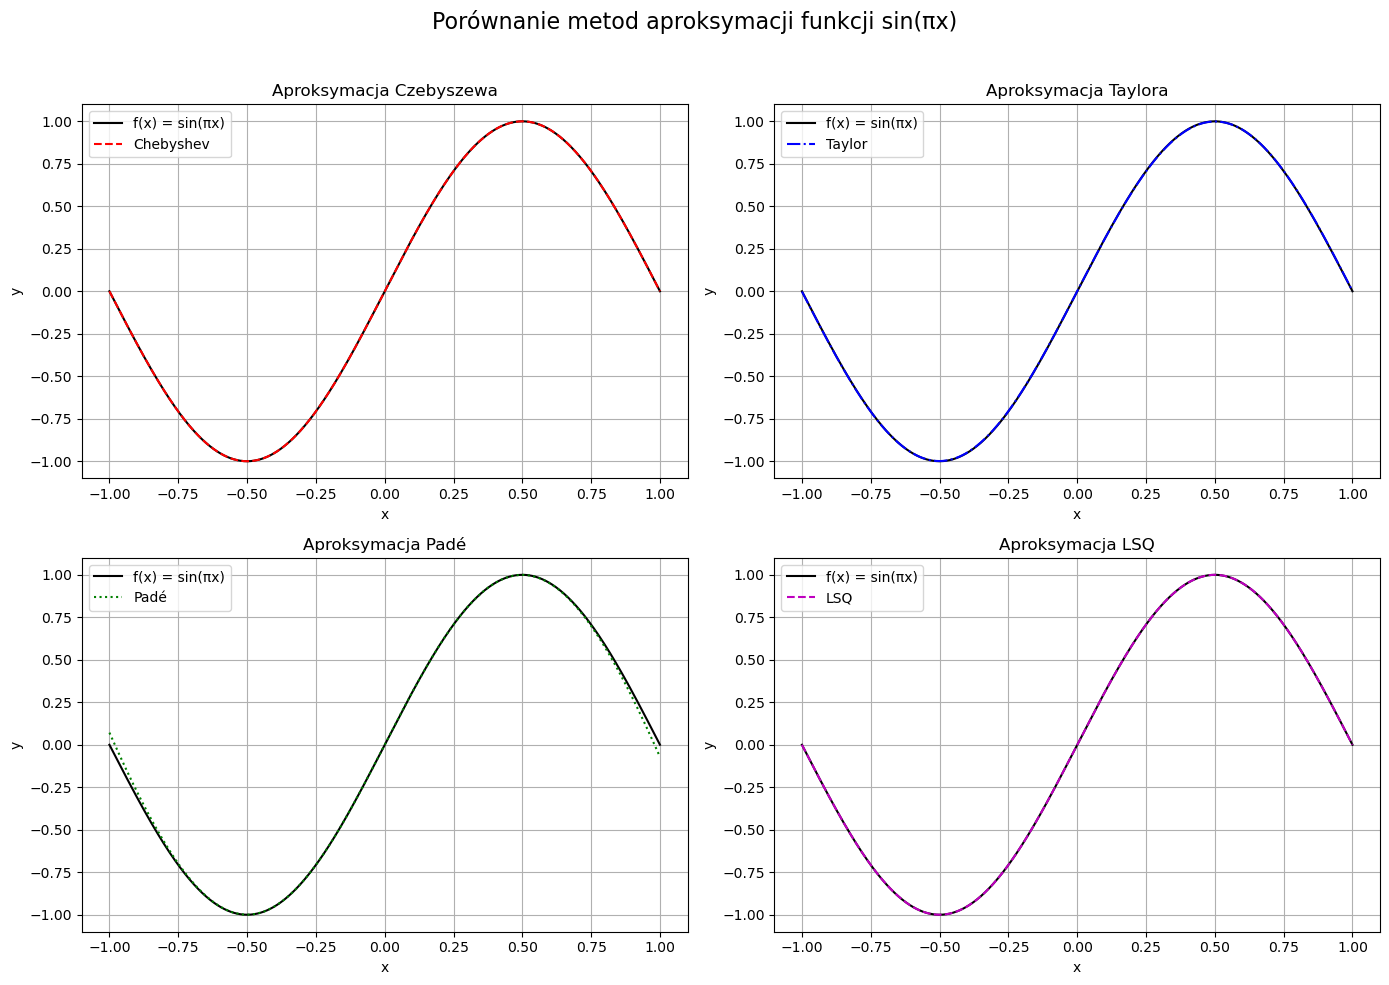

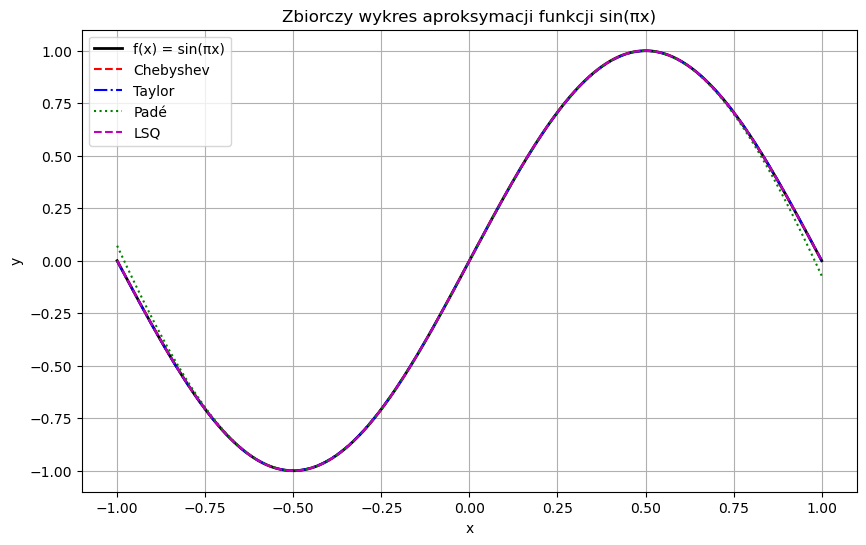

ASE Czebyszewa: 8.851168931946425e-23
ASE Taylora: 3.3676415188218708e-06
ASE Padé: 0.0006512267997011338
ASE LSQ: 8.852814266033187e-23


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import pade, approximate_taylor_polynomial
import math

def f(x):
    return np.sin(np.pi * x)

def ASE(f, W, a=-1, b=1, num_points=1000000):
    dx = (b - a) / num_points
    midpoints = np.linspace(a + dx/2, b - dx/2, num_points)
    error_squared = (f(midpoints) - W(midpoints))**2
    return dx * np.sum(error_squared)

deg = 15

# Aproksymacja Czebyszewa
x_fit = np.linspace(-1, 1, 500)
y_fit = f(x_fit)
cheb_coefs = np.polynomial.chebyshev.chebfit(x_fit, y_fit, deg)
cheb_poly = np.polynomial.chebyshev.Chebyshev(cheb_coefs)
cheb_approx = lambda x: cheb_poly(x)

# Aproksymacja Taylora
taylor_poly = approximate_taylor_polynomial(f, 0, deg, np.pi)
taylor_approx = lambda x: taylor_poly(x)

# Aproksymacja Padé (m+n=8)
m, n = 4, 4
N = m + n
a_coeffs = np.zeros(N + 1)
for k in range(N + 1):
    if k % 2 == 1:
        a_coeffs[k] = ((-1) ** ((k - 1) // 2)) * (np.pi ** k) / math.factorial(k)
p_poly, q_poly = pade(a_coeffs, m, n)
pade_approx = lambda x: p_poly(x) / q_poly(x)

# Aproksymacja LSQ
x_ls = np.linspace(-1, 1, 500)
y_ls = f(x_ls)
lsq_coeff = np.polyfit(x_ls, y_ls, deg)
lsq_poly = np.poly1d(lsq_coeff)
lsq_approx = lambda x: lsq_poly(x)

# Przygotowanie danych do wykresów
x_dense = np.linspace(-1, 1, 1000)
fx = f(x_dense)

# 4 wykresy obok siebie
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

axs[0].plot(x_dense, fx, 'k-', label='f(x) = sin(πx)')
axs[0].plot(x_dense, cheb_approx(x_dense), 'r--', label='Chebyshev')
axs[0].set_title("Aproksymacja Czebyszewa")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(x_dense, fx, 'k-', label='f(x) = sin(πx)')
axs[1].plot(x_dense, taylor_approx(x_dense), 'b-.', label='Taylor')
axs[1].set_title("Aproksymacja Taylora")
axs[1].legend()
axs[1].grid(True)

axs[2].plot(x_dense, fx, 'k-', label='f(x) = sin(πx)')
axs[2].plot(x_dense, pade_approx(x_dense), 'g:', label='Padé')
axs[2].set_title("Aproksymacja Padé")
axs[2].legend()
axs[2].grid(True)

axs[3].plot(x_dense, fx, 'k-', label='f(x) = sin(πx)')
axs[3].plot(x_dense, lsq_approx(x_dense), 'm--', label='LSQ')
axs[3].set_title("Aproksymacja LSQ")
axs[3].legend()
axs[3].grid(True)

for ax in axs:
    ax.set_xlabel("x")
    ax.set_ylabel("y")

plt.suptitle("Porównanie metod aproksymacji funkcji sin(πx)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Wykres zbiorczy
plt.figure(figsize=(10, 6))
plt.plot(x_dense, fx, 'k-', linewidth=2, label='f(x) = sin(πx)')
plt.plot(x_dense, cheb_approx(x_dense), 'r--', label='Chebyshev')
plt.plot(x_dense, taylor_approx(x_dense), 'b-.', label='Taylor')
plt.plot(x_dense, pade_approx(x_dense), 'g:', label='Padé')
plt.plot(x_dense, lsq_approx(x_dense), 'm--', label='LSQ')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Zbiorczy wykres aproksymacji funkcji sin(πx)')
plt.legend()
plt.grid(True)
plt.show()

# Obliczenie błędów aproksymacji (ASE)
ase_cheb = ASE(f, cheb_approx)
ase_taylor = ASE(f, taylor_approx)
ase_pade = ASE(f, pade_approx)
ase_lsq = ASE(f, lsq_approx)

print("ASE Czebyszewa:", ase_cheb)
print("ASE Taylora:", ase_taylor)
print("ASE Padé:", ase_pade)
print("ASE LSQ:", ase_lsq)

### Ćwiczenie 3. (2 pkt)

1. Zaimplementuj naiwny algorytm mnożenia macierzy kwadratowych. Dla coraz większych rozmiarów macierzy zmierz czas działania Twojego algorytmu oraz czas działania mnożenia `A.dot(B)` z `numpy`.
2. Dla obydwu algorytmów znajdź dowolną metodą wielomiany aproksymacyjne odpowiednich stopni najlepiej przybliżające krzywą czasu działania w zależności od rozmiaru macierzy.
3. Naszkicuj otrzymane wielomiany wraz z punktami aproksymacji.
4. Sprawdź, czy stopnie otrzymanych wielomianów są zgodne z teoretyczną złożonością badanych algorytmów. 


Rozmiar macierzy | Czas naiwny [s]   | Czas numpy.dot [s]
             10 |   1.868916e-04 |     1.475375e-06
             20 |   1.616575e-03 |     8.219160e-07
             30 |   5.114233e-03 |     2.013750e-06
             40 |   1.154488e-02 |     3.501458e-06
             50 |   2.224240e-02 |     6.658625e-06
            100 |   1.733977e-01 |     2.656926e-04
            200 |   1.425720e+00 |     5.486655e-04


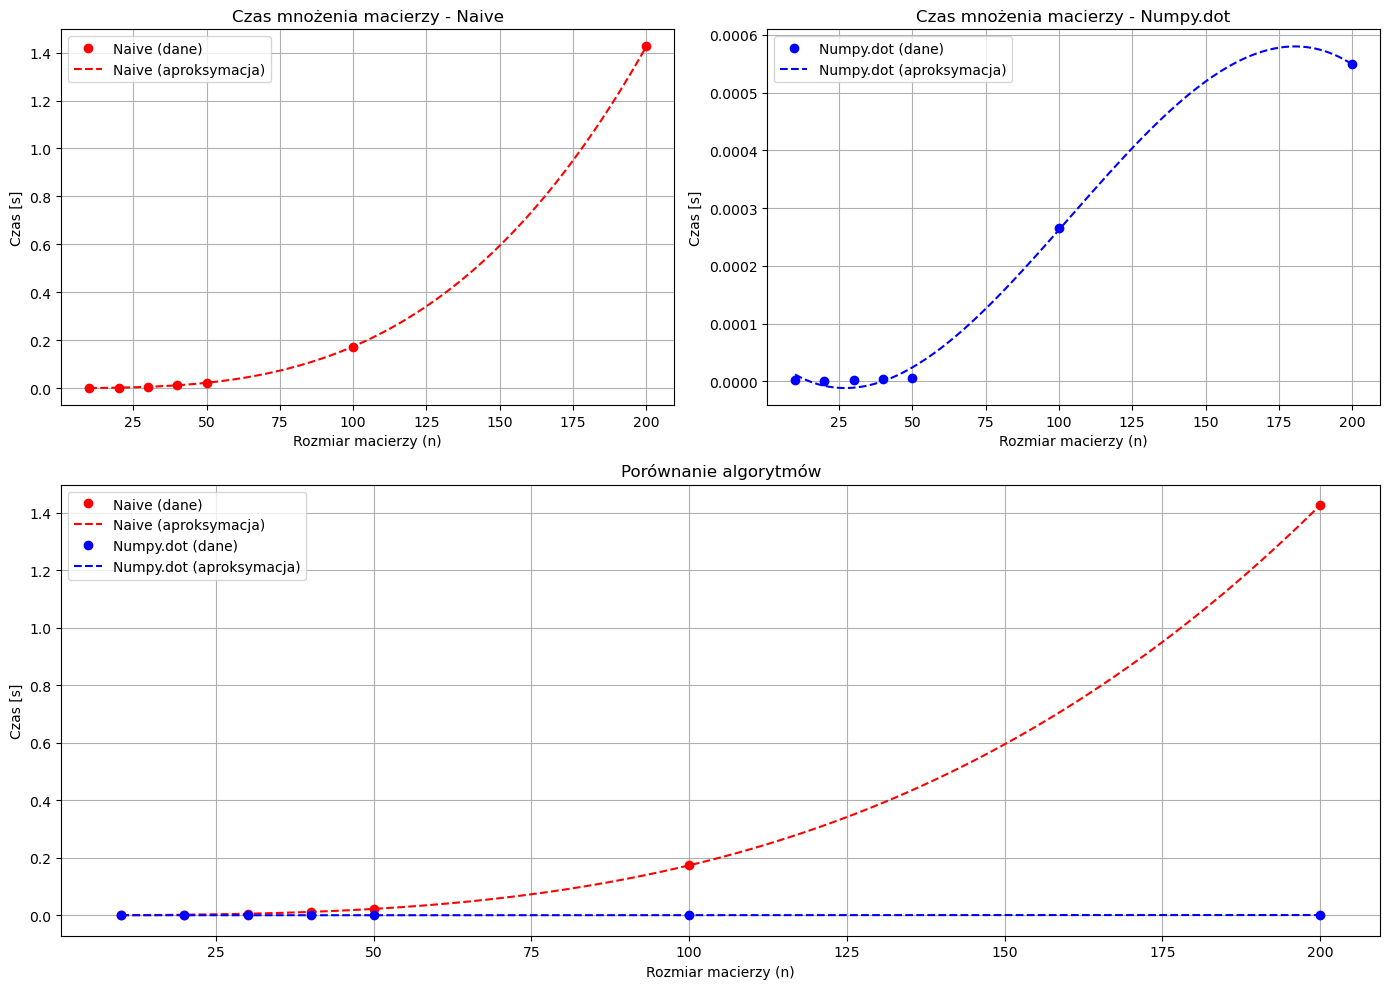

Wielomian dla naiwnego algorytmu: [ 1.88068129e-07 -2.53313872e-06  1.17891360e-04 -1.08113913e-03]
Wielomian dla numpy.dot: [-3.27317793e-10  1.01900369e-07 -4.79260349e-06  4.99338487e-05]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
import matplotlib.gridspec as gridspec

"""Implementacja naiwnego algorytmu mnożenia macierzy kwadratowych"""
def naive_matrix_multiply(A, B):
    n = A.shape[0]
    C = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            s = 0
            for k in range(n):
                s += A[i, k] * B[k, j]
            C[i, j] = s
    return C

"""Definiujemy rozmiary macierzy oraz listy na czasy pomiarów"""
sizes = [10, 20, 30, 40, 50, 100, 200]
times_naive = []
times_numpy = []

"""Dla każdego rozmiaru macierzy wykonujemy pomiary przy użyciu timeit"""
for n in sizes:
    A = np.random.rand(n, n)
    B = np.random.rand(n, n)
    
    repetitions_naive = 5
    repetitions_numpy = 1000
    
    t_naive = timeit.timeit(lambda: naive_matrix_multiply(A, B), number=repetitions_naive) / repetitions_naive
    t_numpy = timeit.timeit(lambda: A.dot(B), number=repetitions_numpy) / repetitions_numpy
    
    times_naive.append(t_naive)
    times_numpy.append(t_numpy)

print("Rozmiar macierzy | Czas naiwny [s]   | Czas numpy.dot [s]")
for n, t_n, t_np in zip(sizes, times_naive, times_numpy):
    print(f"{n:>15} | {t_n:>14.6e} | {t_np:>16.6e}")

"""Dopasowujemy wielomian stopnia 3 (O(n^3)) do danych pomiarowych"""
poly_naive = np.polyfit(sizes, times_naive, 3)
poly_numpy = np.polyfit(sizes, times_numpy, 3)
sizes_dense = np.linspace(min(sizes), max(sizes), 100)
times_naive_fit = np.polyval(poly_naive, sizes_dense)
times_numpy_fit = np.polyval(poly_numpy, sizes_dense)

import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.2])

# Wykres 1 – Naiwny
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(sizes, times_naive, 'ro', label="Naive (dane)")
ax1.plot(sizes_dense, times_naive_fit, 'r--', label="Naive (aproksymacja)")
ax1.set_xlabel("Rozmiar macierzy (n)")
ax1.set_ylabel("Czas [s]")
ax1.set_title("Czas mnożenia macierzy - Naive")
ax1.legend()
ax1.grid(True)

# Wykres 2 – Numpy.dot
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(sizes, times_numpy, 'bo', label="Numpy.dot (dane)")
ax2.plot(sizes_dense, times_numpy_fit, 'b--', label="Numpy.dot (aproksymacja)")
ax2.set_xlabel("Rozmiar macierzy (n)")
ax2.set_ylabel("Czas [s]")
ax2.set_title("Czas mnożenia macierzy - Numpy.dot")
ax2.legend()
ax2.grid(True)

# Wykres 3 – Porównanie obu metod, zajmuje całą dolną część
ax3 = fig.add_subplot(gs[1, :])
ax3.plot(sizes, times_naive, 'ro', label="Naive (dane)")
ax3.plot(sizes_dense, times_naive_fit, 'r--', label="Naive (aproksymacja)")
ax3.plot(sizes, times_numpy, 'bo', label="Numpy.dot (dane)")
ax3.plot(sizes_dense, times_numpy_fit, 'b--', label="Numpy.dot (aproksymacja)")
ax3.set_xlabel("Rozmiar macierzy (n)")
ax3.set_ylabel("Czas [s]")
ax3.set_title("Porównanie algorytmów")
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()

print("Wielomian dla naiwnego algorytmu:", poly_naive)
print("Wielomian dla numpy.dot:", poly_numpy)

### **Analiza dopasowanych wielomianów i czasów wykonania**  

Z dopasowanych wielomianów wynika:  
	• W obu przypadkach dominującym składnikiem wielomianu aproksymacyjnego jest wyraz przy n^3, co potwierdza zgodność z teoretyczną złożonością algorytmów.  
	• Dla algorytmu naiwnego współczynnik przy n^3 jest wyraźnie większy, co skutkuje znacznie dłuższym czasem wykonania.  
	• Dla numpy.dot wartości czasów są o kilka rzędów wielkości mniejsze. Wynika to z faktu, że numpy.dot wykorzystuje wysoce zoptymalizowane implementacje, które znacząco przewyższają prostą pętlową implementację w Pythonie.  
  
Wizualizacja na wykresach również potwierdza, że:  
	• Dla numpy.dot czas rośnie znacznie wolniej i w całym zakresie rozmiarów mieści się w ułamkach sekundy.  
	• Dla algorytmu naiwnego czas rośnie gwałtownie, a dla większych rozmiarów (np. n = 200) przekracza 1 sekundę.  